<a href="https://colab.research.google.com/github/keehyun2/TestPy/blob/master/colab/6-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-평균

## KMeans 클래스

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-06-11 00:13:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-06-11 00:13:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-06-11 00:13:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [26]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

(300, 10000)


In [37]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# kmean 은...

In [38]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
# 애플은 라벨이 2, 파인애플은 0, 바나나는 1로 training

In [39]:
print(km.cluster_centers_)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.10204082 1.07142857 1.10204082 ... 1.         1.         1.        ]
 [1.01111111 1.01111111 1.01111111 ... 1.         1.         1.        ]]


In [5]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


In [ ]:
# 파인애플로 분류된 애들이 많음.
# 사과로 분류된 애들이 적음

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [17]:
print([km.labels_==0])

[array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True

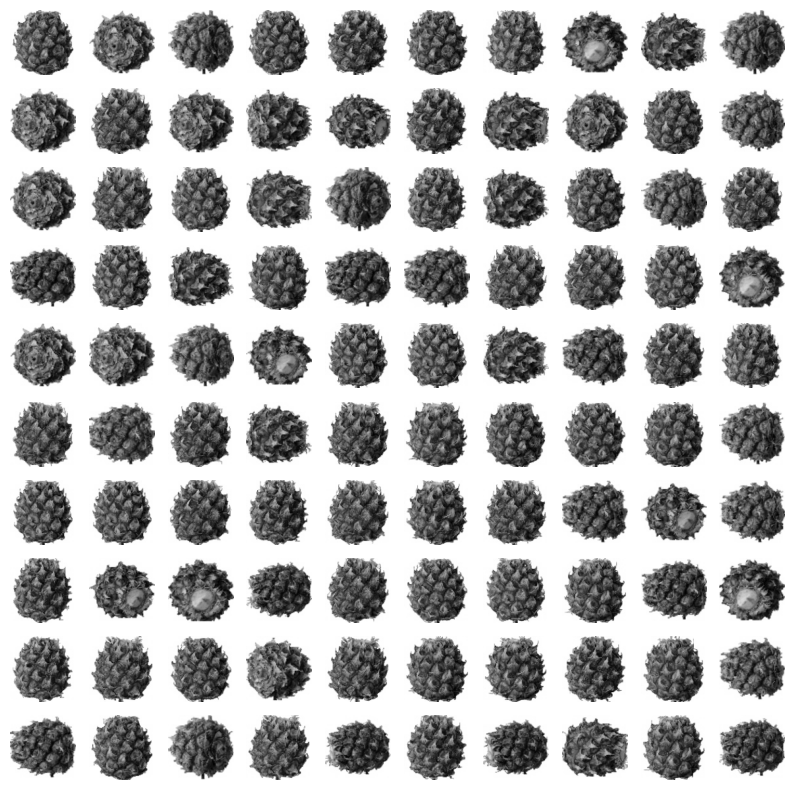

In [19]:
draw_fruits(fruits[100:200])

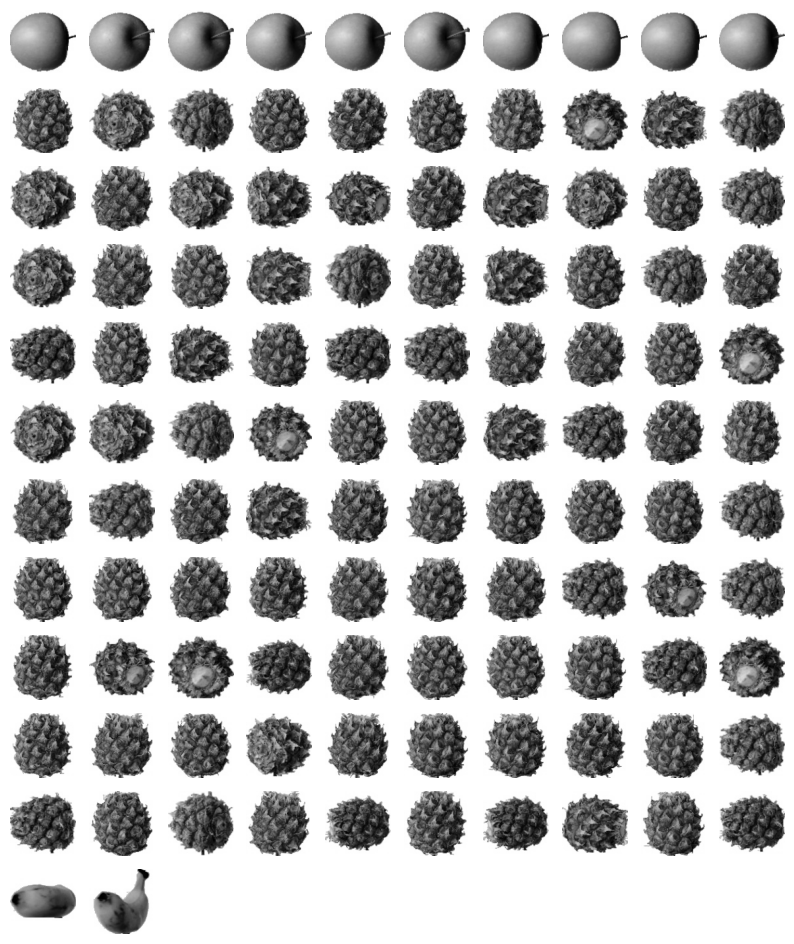

In [7]:
draw_fruits(fruits[km.labels_==0])

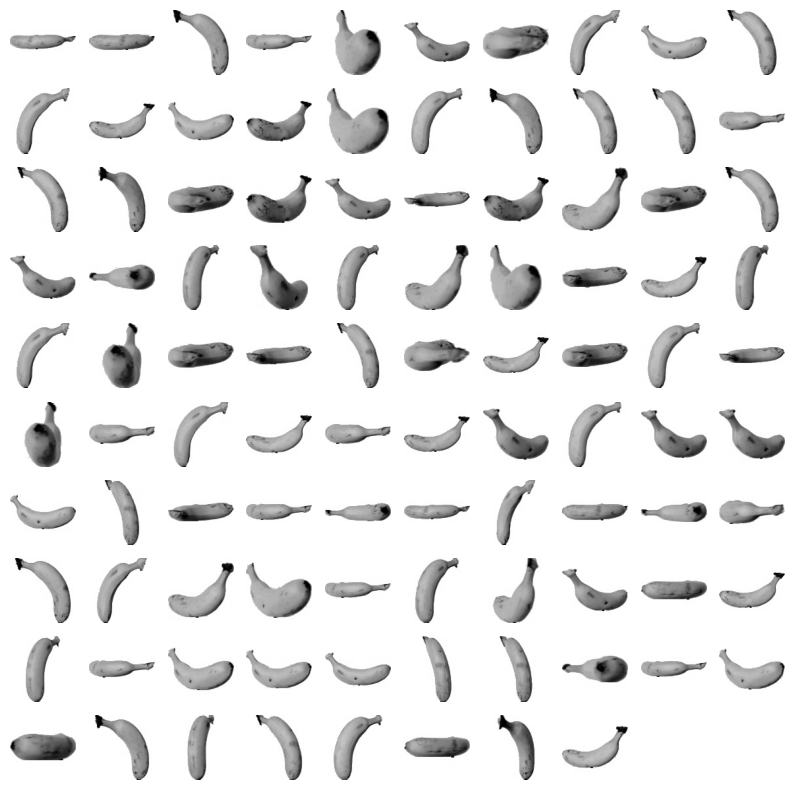

In [8]:
draw_fruits(fruits[km.labels_==1])

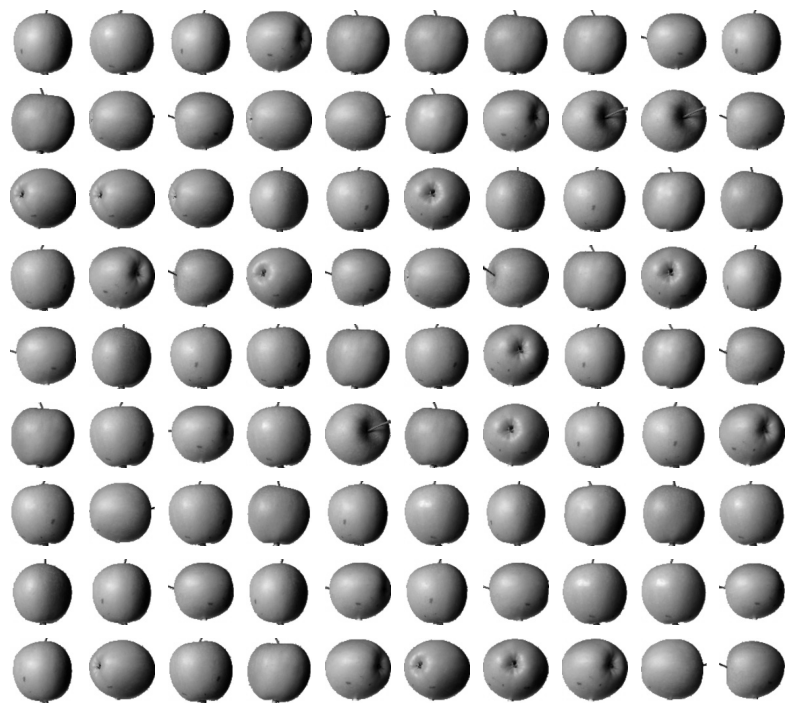

In [9]:
draw_fruits(fruits[km.labels_==2])

## 클러스터 중심

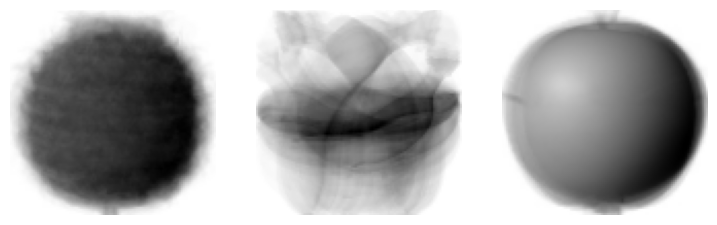

In [10]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [11]:
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


In [12]:
print(km.predict(fruits_2d[100:101]))

[0]


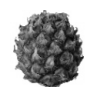

In [13]:
draw_fruits(fruits[100:101])

In [14]:
print(km.n_iter_)

4


## 최적의 k 찾기

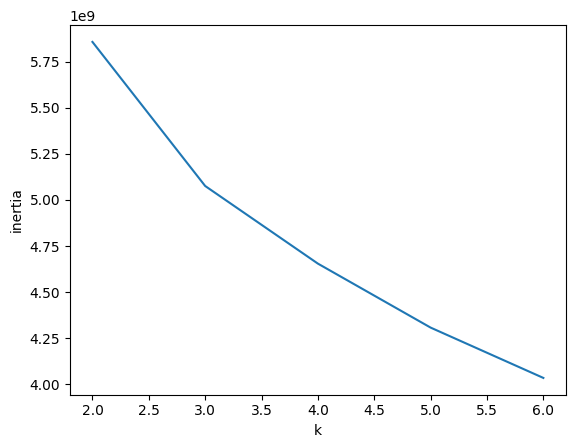

In [33]:
inertia = []
for k in range(2, 7):
    km1 = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km1.fit(fruits_2d)
    inertia.append(km1.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()